In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from yellowbrick.classifier import ConfusionMatrix


In [44]:
base = pd.read_csv('insurance.csv')
base['Accident'] = base['Accident'].fillna("None")


In [45]:
base = base.drop(columns=['Unnamed: 0'])
base.head()

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,NaN,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,NaN,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [46]:
base.shape

(20000, 27)

In [47]:
y = base.iloc[:, 7].values
columns = []
for i in range(27):
  if i != 7:
    columns.append(i)
X = base.iloc[:, columns].values
X

array([[False, 'Adult', 'Prole', ..., False, 'Thousand', 'Many'],
       [False, 'Senior', 'Prole', ..., True, 'Thousand', 'Zero'],
       [False, 'Senior', 'UpperMiddle', ..., True, 'Thousand', 'One'],
       ...,
       [False, 'Senior', 'UpperMiddle', ..., True, 'Thousand', 'Zero'],
       [False, 'Adult', 'Middle', ..., True, 'Thousand', 'Zero'],
       [False, 'Adult', 'Middle', ..., True, 'Thousand', 'Zero']],
      dtype=object)

In [48]:
labelEncoder = LabelEncoder()
for i in range(X.shape[1]):
  if X[:, i].dtype == 'object':
    X[:, i] = labelEncoder.fit_transform(X[:,i])

X

array([[0, 1, 1, ..., 0, 3, 0],
       [0, 2, 1, ..., 1, 3, 2],
       [0, 2, 2, ..., 1, 3, 1],
       ...,
       [0, 2, 2, ..., 1, 3, 2],
       [0, 1, 0, ..., 1, 3, 2],
       [0, 1, 0, ..., 1, 3, 2]], dtype=object)

In [49]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size=0.3, random_state=1)

In [50]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [51]:
previsoes = modelo.predict(X_teste)


In [52]:
previsoes

array(['None', 'None', 'None', ..., 'None', 'Mild', 'None'], dtype='<U8')

In [56]:
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average=None)
recall = recall_score(y_teste, previsoes, average=None)
f1 = f1_score(y_teste, previsoes, average='weighted')

print(f'acuracia: {accuracy}, precisao: {precision}, recall: {recall}, f1: {f1}')

acuracia: 0.8361666666666666, precisao: [0.67457627 0.34980989 0.97525439 1.        ], recall: [0.73431734 0.72871287 0.9973983  0.04689655], f1: 0.8090758902175055


In [59]:
report = classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

        Mild       0.67      0.73      0.70       542
    Moderate       0.35      0.73      0.47       505
        None       0.98      1.00      0.99      4228
      Severe       1.00      0.05      0.09       725

    accuracy                           0.84      6000
   macro avg       0.75      0.63      0.56      6000
weighted avg       0.90      0.84      0.81      6000



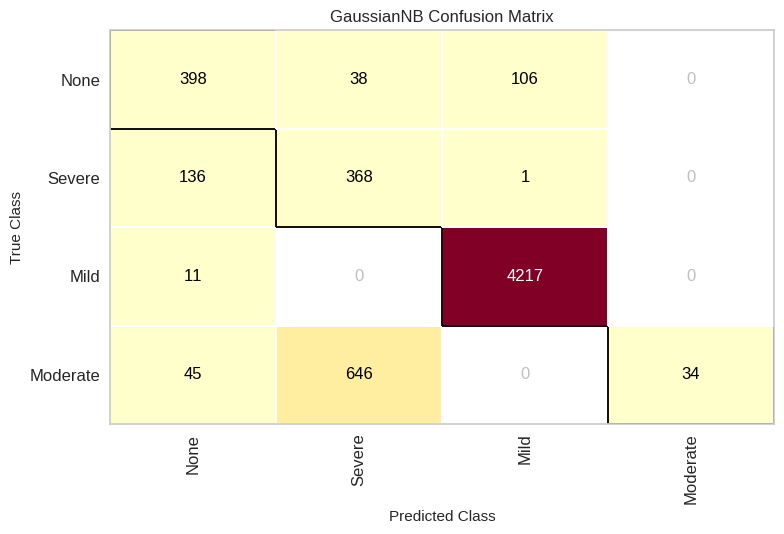

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [60]:
confusao = ConfusionMatrix(modelo, classes=['None', 'Severe', 'Mild', 'Moderate'])
confusao.fit(X_treinamento, y_treinamento)
confusao.score(X_teste, y_teste)
confusao.poof()